In [1]:
import pandas as pd
import pandas_datareader as pdr
import talib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('df.csv',parse_dates=True,index_col='Date')
print(df.columns)
df.tail()

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'next_rtn',
       'log_return', 'MA5', 'MA10', 'RASD5', 'RASD10', 'MACD', 'CCI', 'ATR',
       'ub', 'middle', 'lb', 'MTM1', 'MTM3', 'S&P500', 'SOX', 'VIX'],
      dtype='object')


,High,Low,Open,Close,Volume,Adj Close,next_rtn,log_return,MA5,MA10,...,CCI,ATR,ub,middle,lb,MTM1,MTM3,S&P500,SOX,VIX
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-24,49.639999,48.419998,48.529999,49.160000,29343400.0,49.160000,0.012982,0.006940,49.508000,49.692,...,-99.095298,1.216431,51.542414,49.9350,48.327586,0.340000,-0.560001,3246.590088,2147.419922,28.510000
2020-09-25,50.279999,48.750000,48.959999,49.939999,26633400.0,49.939999,0.020016,0.015742,49.518000,49.758,...,9.749435,1.238828,51.550592,49.9620,48.373408,0.779999,-0.010002,3298.459961,2177.840088,26.379999
2020-09-28,51.459999,50.160000,50.509998,51.430000,29652200.0,51.430000,0.018214,0.029399,49.860000,49.960,...,201.957021,1.258912,51.715181,50.0120,48.308819,1.490002,2.610001,3351.600098,2237.639893,26.190001
2020-09-29,51.740002,50.950001,51.310001,51.189999,19558200.0,51.189999,-0.002339,-0.004677,50.107999,50.079,...,181.023671,1.225418,51.756575,50.0240,48.291425,-0.240002,2.029999,3335.469971,2242.520020,26.270000
2020-09-30,52.380001,51.150002,51.240002,51.779999,27698300.0,51.779999,0.010539,0.011460,50.699999,50.220,...,178.900064,1.225746,51.942021,50.0735,48.204979,0.590000,1.840000,3363.000000,2244.120117,26.370001


In [7]:
#Rate of Change
df['ROC'] = talib.ROC(df['Close'],timeperiod=60)
#Williams' %R
df['WPR'] = talib.WILLR(df['High'],df['Low'],df['Close'],timeperiod=14)

특성 목록

In [8]:
feature1_list = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close','log_return']
feature2_list = ['MA5', 'MA10', 'RASD5', 'RASD10', 'MACD', 'CCI', 'ATR',
                 'ub', 'middle', 'lb', 'MTM1', 'MTM3']
feature3_list = [ 'S&P500', 'SOX', 'VIX']
feature4_list = ['next_rtn']

all_features = feature1_list+feature2_list+feature3_list+feature4_list

구간 분리
 
 
   학습 2년, 검증 3개월, 테스트 3개월

In [10]:
phase_flag = '3'

if phase_flag == '1':
    train_from = '2010-01-04'
    train_to = '2012-01-01'
    
    val_from = '2012-01-01'
    val_to = '2012-04-01'
    
    test_from = '2012-04-01'
    test_to = '2012-07-01'

elif phase_flag == '2':
    train_from = '2010-07-01'
    train_to = '2014-07-01'
    
    val_from = '2014-07-01'
    val_to = '2014-10-01'
    
    test_from = '2014-10-01'
    test_to = '2015-01-01'
    
else:
    train_from = '2015-01-01'
    train_to = '2017-01-01'
    
    val_from = '2017-01-01'
    val_to = '2017-04-01'
    
    test_from = '2017-04-01'
    test_to = '2017-07-01'

In [11]:
# 학습/검증/테스트
train_df = df.loc[train_from:train_to,all_features].copy()
val_df = df.loc[val_from:val_to,all_features].copy()
test_df = df.loc[test_from:test_to,all_features].copy()

In [18]:
def min_max_normal(tmp_df):
    eng_list = []
    sample_df = tmp_df.copy()
    for x in all_features:
        if x in feature4_list:
            continue
        series = sample_df[x].copy()
        values = series.values
        values = values.reshape(len(values),1)
        #스케일러 생성 및 훈련
        scaler = MinMaxScaler(feature_range=(0,1))
        scaler = scaler.fit(values)
        #데이터셋 정규화 및 출력
        normalized = scaler.transform(values)
        new_feature = '{}_normal'.format(x)
        eng_list.append(new_feature)
        sample_df[new_feature] = normalized
    return sample_df,eng_list

In [19]:
train_sample_df, eng_list = min_max_normal(train_df)
val_sample_df, eng_list = min_max_normal(val_df)
test_sample_df, eng_list = min_max_normal(test_df)

In [27]:
print(eng_list)
train_sample_df.head()

['High_normal', 'Low_normal', 'Open_normal', 'Close_normal', 'Volume_normal', 'Adj Close_normal', 'log_return_normal', 'MA5_normal', 'MA10_normal', 'RASD5_normal', 'RASD10_normal', 'MACD_normal', 'CCI_normal', 'ATR_normal', 'ub_normal', 'middle_normal', 'lb_normal', 'MTM1_normal', 'MTM3_normal', 'S&P500_normal', 'SOX_normal', 'VIX_normal']


,High,Low,Open,Close,Volume,Adj Close,log_return,MA5,MA10,RASD5,...,CCI_normal,ATR_normal,ub_normal,middle_normal,lb_normal,MTM1_normal,MTM3_normal,S&P500_normal,SOX_normal,VIX_normal
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,37.160000,36.110001,36.669998,36.360001,23605600.0,31.082489,0.001927,36.828,36.961,0.360369,...,0.471270,0.491009,0.873208,0.925185,0.895993,0.622449,0.408772,0.517622,0.335631,0.221242
2015-01-05,36.450001,35.939999,36.200001,35.950001,32785000.0,30.732008,-0.011340,36.508,36.854,0.359143,...,0.378496,0.467702,0.866731,0.917040,0.887670,0.524490,0.410527,0.432631,0.301055,0.293519
2015-01-06,36.230000,35.259998,36.080002,35.279999,30847600.0,30.159252,-0.018813,36.128,36.745,0.429746,...,0.288137,0.503756,0.861823,0.904148,0.869702,0.471428,0.375438,0.392034,0.262216,0.334238
2015-01-07,36.070000,35.270000,35.639999,36.020000,27725200.0,30.791851,0.020758,35.980,36.626,0.449678,...,0.333775,0.515911,0.854890,0.897783,0.864876,0.759184,0.492983,0.444650,0.279162,0.272820
2015-01-08,37.000000,36.259998,36.369999,36.689999,31765400.0,31.364601,0.018430,36.060,36.552,0.450896,...,0.504040,0.549775,0.852994,0.896704,0.864705,0.744898,0.682456,0.526523,0.330158,0.194774


In [56]:
def create_dataset_binary(data,feature_list,step,n):
    #LSTM에 넣을 변수데이터 선택
    train_xdata = np.array(data[feature_list[0:n]])
    #마지막 단계 설정
    m = np.arange(len(train_xdata)-step)
    x,y = [],[]
    for i in m:
        # 각 단계마다 사용할 학습데이터 기간 설정
        a = train_xdata[i:(i+step)]
        x.append(a)
    #신경망 학슴에 사용할 수 있도록 데이터 정리 
    #len(m): 한 칸씩 미뤘을 때 만들 수 있는 최대사각형 수, step: 사각형 범위 안에 행 수 ,n: 열의 개수(=특성 개수)
    x_batch = np.reshape(np.array(x),(len(m),step,n))
    #레이블링 데이터
    train_ydata = np.array(data[[feature_list[n]]])
    
    for i in m+step:
        #이진 분류를 위한 시작종가, 종료종가 설정
        next_rtn = train_ydata[i][0]
        
        if next_rtn>0:
            label = 1
        else:
            label = 0
        y.append(label)
    #학습을 위해1차원 열 벡터 형태로 정리    
    y_batch = np.reshape(np.array(y),(-1,1))
    return x_batch,y_batch

In [57]:
num_step = 5
num_unit = 200
n_feature = len(eng_list)-1

X_train,y_train = create_dataset_binary(train_sample_df[eng_list],eng_list,num_step,n_feature)
X_val,y_val = create_dataset_binary(val_sample_df[eng_list],eng_list,num_step,n_feature)
X_test,y_test = create_dataset_binary(test_sample_df[eng_list],eng_list,num_step,n_feature)

In [58]:
# 사각형 499묶음, row = 5, 21개의 특성 = 21개 특성을 5일 데이터를 이용해 6일째 종가 예측을 1일씩 윈도우를 슬라이딩하여 499번이동
X_train.shape

(499, 5, 21)

In [60]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 2)
y_val = to_categorical(y_val, 2)
y_test = to_categorical(y_test, 2)

# LSTM모델 구조

In [61]:
#application of deep learning to algorithmic trading(2017)
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input,Dropout,Dense,LSTM,Activation,BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

## 5개의 LSTM층과 200개의 뉴런을 사용
 각 LSTM층에 200개의 뉴런을 사용할 수 있게 매개변수를 전달하고 5개의 LSTM층을 겹겹이 쌓아 L2정규화 방법을 각 층에 적용
 
 
 BatchNormalize : 신경망의 입력값을 평균=0, 분산이=1로 정규화 -> 네트워크 학습이 잘 일어나도록
 
 
 Dropout : 임의의 확률로 노드에서 출력하는 가중치 선 제거 -> 네트워크 학습 시 과적합 방지

In [62]:
K.clear_session()
input_layer = Input(batch_shape=(None, X_train.shape[1], X_train.shape[2])) # 데이터 개수:None(모든 임의의 스칼라), 시간축, 특성데이터(LSTM층에 한번에 입력되는 데이터 수 )

# LSTM(input)(input_layer)
# 다층 구조 LSTM  이전 층에서 사용한 출력이 다음 층에 전달되야 하기 때문에 return_sequences = True, 마지막 층에서는 제외
# LSTM -> BatchNormalize -> LSTM -> Dropout 반복 마지막은 완전 연결층으로 연결되면서 최종 예측값 출력
layer_lstm_1 = LSTM(num_unit, return_sequences = True, recurrent_regularizer = regularizers.l2(0.01))(input_layer)
layer_lstm_1 = BatchNormalization()(layer_lstm_1)
layer_lstm_2 = LSTM(num_unit, return_sequences = True, recurrent_regularizer = regularizers.l2(0.01))(layer_lstm_1)
layer_lstm_2 = Dropout(0.25)(layer_lstm_2)
layer_lstm_3 = LSTM(num_unit, return_sequences = True, recurrent_regularizer = regularizers.l2(0.01))(layer_lstm_2)
layer_lstm_3 = BatchNormalization()(layer_lstm_3)
layer_lstm_4 = LSTM(num_unit, return_sequences = True, recurrent_regularizer = regularizers.l2(0.01))(layer_lstm_3)
layer_lstm_4 = Dropout(0.25)(layer_lstm_4)
layer_lstm_5 = LSTM(num_unit , recurrent_regularizer = regularizers.l2(0.01))(layer_lstm_4)
layer_lstm_5 = BatchNormalization()(layer_lstm_5)
output_layer = Dense(2, activation='sigmoid')(layer_lstm_5)

model = Model(input_layer, output_layer)
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [63]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5, 21)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 5, 200)            177600    
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 200)            800       
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 200)            320800    
_________________________________________________________________
dropout (Dropout)            (None, 5, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 200)            320800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 200)            800   

In [64]:
histoty = model.fit(X_train, y_train, epochs = 20, batch_size = 10, verbose = 1, validation_data = (X_val,y_val))

Epoch 1/20
50/50 [==============================] - 5s 105ms/step - loss: 4.7430 - accuracy: 0.6333 - val_loss: 1.7438 - val_accuracy: 0.9825
Epoch 2/20
50/50 [==============================] - 2s 43ms/step - loss: 0.7030 - accuracy: 0.7916 - val_loss: 0.4161 - val_accuracy: 0.9825
Epoch 3/20
50/50 [==============================] - 2s 44ms/step - loss: 0.2594 - accuracy: 0.7555 - val_loss: 0.1452 - val_accuracy: 0.9825
Epoch 4/20
50/50 [==============================] - 2s 44ms/step - loss: 0.1529 - accuracy: 0.8377 - val_loss: 0.1802 - val_accuracy: 0.9298
Epoch 5/20
50/50 [==============================] - 2s 46ms/step - loss: 0.2115 - accuracy: 0.7896 - val_loss: 0.1744 - val_accuracy: 0.8947
Epoch 6/20
50/50 [==============================] - 2s 49ms/step - loss: 0.1771 - accuracy: 0.8176 - val_loss: 0.1262 - val_accuracy: 0.8947
Epoch 7/20
50/50 [==============================] - 3s 52ms/step - loss: 0.1833 - accuracy: 0.8337 - val_loss: 0.2193 - val_accuracy: 0.7895
Epoch 8/20
5

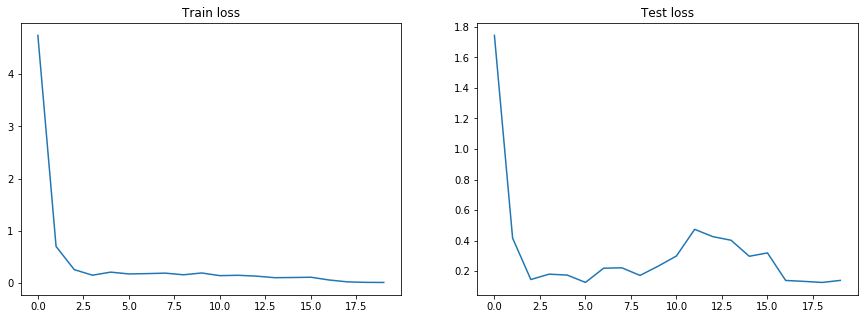

In [66]:
def plot_history(history):
    plt.figure(figsize=(15,5))
    ax = plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.title("Train loss")
    ax = plt.subplot(1,2,2)
    plt.plot(history.history['val_loss'])
    plt.title("Test loss")
plot_history(histoty)

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predicted = model.predict(X_test)
y_pred = np.argmax(predicted,axis=1)
Y_test = np.argmax(y_test,axis=1)
cm = confusion_matrix(y_pred,Y_test)
report = classification_report(Y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
tn = cm[0][0]
fn = cm[1][0]
tp = cm[1][1]
fp = cm[0][1]
if tp == 0:
    tp=1
if tn == 0:
    tn=1
if fp == 0:
    fp=1
if fn == 0:
    fn=1
    
TPR = float(tp)/(float(tp)+float(fn))
FPR = float(fp)/(float(fp)+float(tn))
accuracy = round((float(tp)+float(tn))/(float(tp)+float(fp)+float(fn)+float(tn)),3)
specificity = round(float(tn)/(float(tn)+float(fp)),3)
sensitivity = round(float(tp)/(float(tp)+float(fn)),3)
mcc = round((float(tp)*float(tn)-float(fp)*float(fn))/math.sqrt((float(tp)+float(fp))*(float(tp)+float(fn))*(float(tn)+float(fp))*(float(tn)+float(fn))),3)

In [91]:
print('TPR:         %.2f'%TPR)
print('FPR:         %.2f'%FPR)
print('acc:         %.2f'%accuracy)
print('specificity: %.2f'%sensitivity)
print('mcc:         %.2f'%mcc)

TPR:         0.98
FPR:         0.50
acc:         0.97
specificity: 0.98
mcc:         0.48


In [92]:
f_output = open('binary_lstm_open_close_phase3_dropout_batch_Normal_3단계 test.txt', 'a')
f_output.write('=======\n')
f_output.write('{}epochs_{}batch\n'.format(
    20, 10))
f_output.write('TN: {}\n'.format(tn))
f_output.write('FN: {}\n'.format(fn))
f_output.write('TP: {}\n'.format(tp))
f_output.write('FP: {}\n'.format(fp))
f_output.write('TPR: {}\n'.format(TPR))
f_output.write('FPR: {}\n'.format(FPR))
f_output.write('accuracy: {}\n'.format(accuracy))
f_output.write('specificity: {}\n'.format(specificity))
f_output.write("sensitivity : {}\n".format(sensitivity))
f_output.write("mcc : {}\n".format(mcc))
f_output.write("{}".format(report))
f_output.write('=======\n')
f_output.close()

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

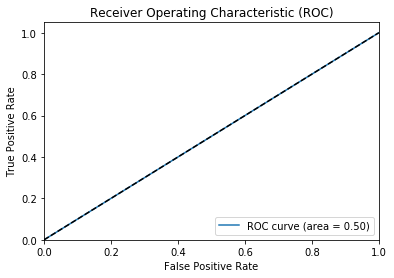

ROC AUC 값 : 0.5000


In [84]:
plot_roc(y_pred,Y_test)
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(Y_test,y_pred)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

In [85]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [87]:
print(len(y_test))
print(len(y_pred))

58
58


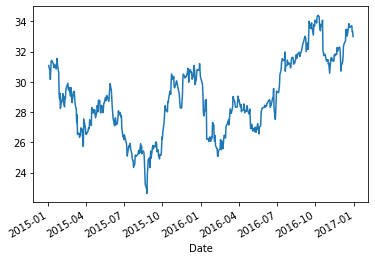

In [93]:
train_sample_df['Adj Close'].plot()

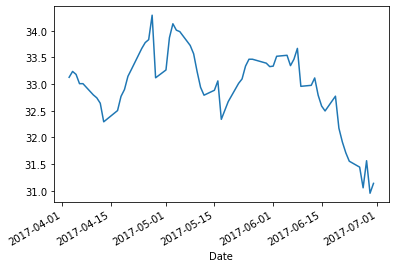

In [95]:
test_sample_df['Adj Close'].plot()

In [98]:
lstm_book_df = test_sample_df[['Adj Close','next_rtn']].copy()
t1 = pd.DataFrame(data=y_pred,columns=['position'],index=lstm_book_df.index[5:])
lstm_book_df = lstm_book_df.join(t1,how='left')
lstm_book_df.fillna(0,inplace=True)
lstm_book_df['ret'] = lstm_book_df['Adj Close'].pct_change()
lstm_book_df['lstm_ret'] = lstm_book_df['next_rtn']*lstm_book_df['position'].shift(1)
lstm_book_df['lstm_cumret'] = (lstm_book_df['lstm_ret']+1).cumprod()
lstm_book_df['bm_cumret'] = (lstm_book_df['ret']+1).cumprod()

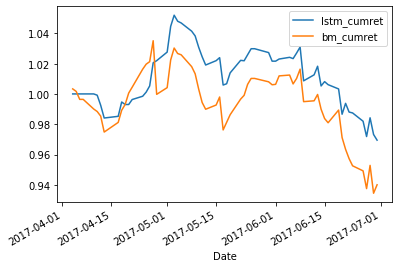

In [99]:
lstm_book_df[['lstm_cumret','bm_cumret']].plot()

# Backtesting

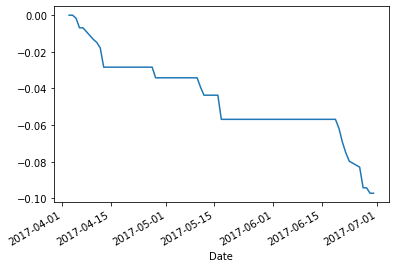

In [102]:
historical_max = lstm_book_df['Adj Close'].cummax()
daily_drawdown = lstm_book_df['Adj Close'] / historical_max - 1.0
historical_dd = daily_drawdown.cummin()
historical_dd.plot()

# BM

In [103]:
CAGR = lstm_book_df.loc[lstm_book_df.index[-1],'bm_cumret'] ** (252./len(lstm_book_df.index)) -1
Sharpe = np.mean(lstm_book_df['ret']) / np.std(lstm_book_df['ret']) * np.sqrt(252.)
VOL = np.std(lstm_book_df['ret']) * np.sqrt(252.)
MDD = historical_dd.min()
print('CAGR : ',round(CAGR*100,2),'%')
print('Sharpe : ',round(Sharpe,2))
print('VOL : ',round(VOL*100,2),'%')
print('MDD : ',round(-1*MDD*100,2),'%')

CAGR :  -21.92 %
Sharpe :  -1.62
VOL :  14.82 %
MDD :  9.73 %


# LSTM

In [104]:
CAGR = lstm_book_df.loc[lstm_book_df.index[-1],'lstm_cumret'] ** (252./len(lstm_book_df.index)) -1
Sharpe = np.mean(lstm_book_df['lstm_ret']) / np.std(lstm_book_df['lstm_ret']) * np.sqrt(252.)
VOL = np.std(lstm_book_df['lstm_ret']) * np.sqrt(252.)
MDD = historical_dd.min()
print('CAGR : ',round(CAGR*100,2),'%')
print('Sharpe : ',round(Sharpe,2))
print('VOL : ',round(VOL*100,2),'%')
print('MDD : ',round(-1*MDD*100,2),'%')

CAGR :  -11.66 %
Sharpe :  -1.08
VOL :  11.11 %
MDD :  9.73 %
